In [4]:
#Making initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#reading csv file into a pandas Dataframe
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [8]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
#Getting Info about data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [11]:
#Lets see the size of data 
df1.shape

(13320, 9)

In [14]:
#Lets analyze availability column
df1['availability'].unique()
#Difficult to handle. Lets remove it

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [15]:
df1.drop('availability',axis=1,inplace=True)

In [17]:
#Availability has been dropped
df1.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [22]:
#Lets analyze location
df['location'].nunique()
#There are lots of unique values, so it is not feasable to one-hot encode this. Lets remove this too

1305

In [23]:
df1.drop('location',axis=1,inplace=True)

In [29]:
#Lets analyze area_type
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [32]:
#Lets one-hot encode this
area = pd.get_dummies(df['area_type'],drop_first=True)
area

,Carpet Area,Plot Area,Super built-up Area
0,0,0,1
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
13315,0,0,0
13316,0,0,1
13317,0,0,0
13318,0,0,1


In [40]:
#Lets Merge the two data frames and drop area_type column
df2 = pd.concat([df1,area],axis=1)

In [41]:
df2.head()

,area_type,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,1
1,Plot Area,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,1,0
2,Built-up Area,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0
3,Super built-up Area,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,1
4,Super built-up Area,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,1


In [43]:
df2.drop('area_type',inplace=True,axis=1)

In [44]:
df2.head()

,size,society,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,1
1,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,1,0
2,3 BHK,NaN,1440,2.0,3.0,62.00,0,0,0
3,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,1
4,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,1


In [45]:
df2.drop('society',inplace=True,axis=1)

In [46]:
df2.head()

,size,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,3 BHK,1440,2.0,3.0,62.00,0,0,0
3,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,2 BHK,1200,2.0,1.0,51.00,0,0,1


In [51]:
#Lets analyze balcony

C:\Users\yashw\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balcony', ylabel='count'>

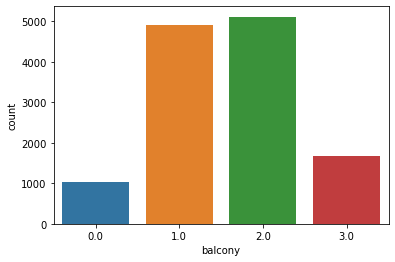

In [53]:
sns.countplot(df2['balcony'])

In [58]:
#balcony has a few null values, lets fill it with 2
df2['balcony'] = df2['balcony'].fillna(value=2.0)

In [59]:
df2.isnull().sum()

size                    16
total_sqft               0
bath                    73
balcony                  0
price                    0
Carpet  Area             0
Plot  Area               0
Super built-up  Area     0
dtype: int64

In [60]:
#Lets drop remaining null values as they are less

In [62]:
df3 = df2.dropna()

In [63]:
df3.head()

,size,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area
0,2 BHK,1056,2.0,1.0,39.07,0,0,1
1,4 Bedroom,2600,5.0,3.0,120.00,0,1,0
2,3 BHK,1440,2.0,3.0,62.00,0,0,0
3,3 BHK,1521,3.0,1.0,95.00,0,0,1
4,2 BHK,1200,2.0,1.0,51.00,0,0,1


In [65]:
#lets deal with BHK
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [66]:
df3['bhk'] = df3['size'].apply(lambda x: x.split(" ")[0])

C:\Users\yashw\AppData\Local\Temp/ipykernel_4236/4014045060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: x.split(" ")[0])


In [72]:
df3['bhk'] = df3['bhk'].apply(lambda x: int(x))
df3.drop('size',axis=1,inplace=True)

C:\Users\yashw\AppData\Local\Temp/ipykernel_4236/2095959907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['bhk'].apply(lambda x: int(x))
C:\Users\yashw\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
df3.head()

,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
0,1056,2.0,1.0,39.07,0,0,1,2
1,2600,5.0,3.0,120.00,0,1,0,4
2,1440,2.0,3.0,62.00,0,0,0,3
3,1521,3.0,1.0,95.00,0,0,1,3
4,1200,2.0,1.0,51.00,0,0,1,2


In [74]:
# we can find some houses with more than 20 bedrooms but low sqft area.
# To clean those errors, we need a better estimate for our sqft area

In [76]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [77]:
# We have some values in the form of a range, i.e '1133 - 1384'.
# We need to identify these and replace them with their avg value

In [78]:
# Lets identify float values in that column
def FindFloats(x):
    try:
        float(x)
    except:
        return False
    return True

In [82]:
df3[~df3['total_sqft'].apply(FindFloats)]
#SO a total of 190 columns have sqft area in the form of a range.
# But some of them are represented as 34.4sq metres, 4126 perch etc....

,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
30,2100 - 2850,4.0,0.0,186.000,0,0,1,4
122,3067 - 8156,4.0,0.0,477.000,0,0,1,4
137,1042 - 1105,2.0,0.0,54.005,0,0,1,2
165,1145 - 1340,2.0,0.0,43.490,0,0,1,2
188,1015 - 1540,2.0,0.0,56.800,0,0,1,2
...,...,...,...,...,...,...,...,...
12975,850 - 1060,2.0,0.0,38.190,0,0,1,2
12990,1804 - 2273,3.0,0.0,122.000,0,0,1,3
13059,1200 - 1470,2.0,0.0,72.760,0,0,1,2
13265,1133 - 1384,2.0,0.0,59.135,0,0,1,2


In [98]:
def ConvertRanges(x):
    tokens = x.split('-')
    #This if executes only when the data is like a range
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    #This part executes otherwise
    try:
        return float(x)
    except:
        return None

In [100]:
#Lets test our func
ConvertRanges('26333'),ConvertRanges('29901-31311')

(26333.0, 30606.0)

In [103]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(ConvertRanges)

In [104]:
df4.head()

,total_sqft,bath,balcony,price,Carpet Area,Plot Area,Super built-up Area,bhk
0,1056.0,2.0,1.0,39.07,0,0,1,2
1,2600.0,5.0,3.0,120.00,0,1,0,4
2,1440.0,2.0,3.0,62.00,0,0,0,3
3,1521.0,3.0,1.0,95.00,0,0,1,3
4,1200.0,2.0,1.0,51.00,0,0,1,2


In [105]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_sqft            13201 non-null  float64
 1   bath                  13247 non-null  float64
 2   balcony               13247 non-null  float64
 3   price                 13247 non-null  float64
 4   Carpet  Area          13247 non-null  uint8  
 5   Plot  Area            13247 non-null  uint8  
 6   Super built-up  Area  13247 non-null  uint8  
 7   bhk                   13247 non-null  int64  
dtypes: float64(4), int64(1), uint8(3)
memory usage: 659.8 KB


In [106]:
df4.isnull().sum()

total_sqft              46
bath                     0
balcony                  0
price                    0
Carpet  Area             0
Plot  Area               0
Super built-up  Area     0
bhk                      0
dtype: int64

In [108]:
df4 = df4.dropna()